# Sorting in folders

In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd
from shutil import copyfile
from tqdm.auto import tqdm

def check_path(path):
    os.system("if [ ! -d " + path + " ]; then mkdir -p " + path + "; fi")

In [2]:
labels_path = 'train.csv'
labels = pd.read_csv(labels_path)
display(labels.head(2))

,name,category
0,0.jpg,47
1,1.jpg,60


In [3]:
train_X, val_X = train_test_split(labels, test_size=0.1)

In [4]:
train_X.head(2)

,name,category
3418,3418.jpg,15
4864,4864.jpg,83


In [5]:
categories_train = train_X.groupby(['category'])['name'].apply(lambda grp: list(grp)).to_dict()
categories_val = val_X.groupby(['category'])['name'].apply(lambda grp: list(grp)).to_dict()

In [6]:
def make_cat(categories,train_path,output_path):
    check_path(output_path)
    for key in tqdm(categories.keys()):
        check_path(output_path+str(key))
        for pict_name in categories[key]:
            try:
                copyfile(train_path+pict_name, output_path+str(key)+"/"+pict_name)
            except Exception as e:
                print("Problem with ", train_path+pict_name)
                print(e)

In [7]:
# os.listdir("train/train")

In [8]:
train_path = "train/train/"
output_train_path = "image_data2/train/"
output_val_path = "image_data2/val/"

make_cat(categories_train,train_path,output_train_path)
make_cat(categories_val,train_path,output_val_path)

# Augmentation pipeline

In [9]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import PIL.Image as img

# Uploading dataset
def img_array(path):
    image = img.open(path)
    tmp = np.array(image)
    image.close()
    return tmp

In [10]:
import Augmentor
from Augmentor import Pipeline

def augmentation(path, n):
    p = Augmentor.Pipeline(path) # ensure you press enter after this, don't just c&p this code.
    Pipeline.set_seed(100)
    p.rotate(probability=0.3, max_left_rotation=3, max_right_rotation=3)
    p.random_distortion(probability=0.9, grid_width=20, grid_height=20, magnitude=2)
    p.random_erasing(probability=0.5, rectangle_area=0.2)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.sample(n)

path = output_train_path

for i in range(0,100):
    augmentation(path+str(i)+'/', 400 - len(categories_train[i]))

Executing Pipeline:   0%|          | 0/181 [00:00<?, ? Samples/s]

Initialised with 219 image(s) found.
Output directory set to image_data2/train/0/output.

Processing <PIL.Image.Image image mode=RGB size=584x1012 at 0x7F61600916D8>: 100%|██████████| 181/181 [00:04<00:00, 39.89 Samples/s]                  
Executing Pipeline:   0%|          | 0/264 [00:00<?, ? Samples/s]

Initialised with 136 image(s) found.
Output directory set to image_data2/train/1/output.

Processing <PIL.Image.Image image mode=RGB size=314x1024 at 0x7F610F173780>: 100%|██████████| 264/264 [00:04<00:00, 61.57 Samples/s]                  
Executing Pipeline:   0%|          | 0/176 [00:00<?, ? Samples/s]

Initialised with 224 image(s) found.
Output directory set to image_data2/train/2/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F6150183588>: 100%|██████████| 176/176 [00:04<00:00, 40.42 Samples/s]                
Executing Pipeline:   0%|          | 0/179 [00:00<?, ? Samples/s]

Initialised with 221 image(s) found.
Output directory set to image_data2/train/3/output.

Processing <PIL.Image.Image image mode=RGB size=1242x1207 at 0x7F6150183B00>: 100%|██████████| 179/179 [00:04<00:00, 40.59 Samples/s]                
Executing Pipeline:   0%|          | 0/206 [00:00<?, ? Samples/s]

Initialised with 194 image(s) found.
Output directory set to image_data2/train/4/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F6162CA1240>: 100%|██████████| 206/206 [00:04<00:00, 45.90 Samples/s]                   
Executing Pipeline:   0%|          | 0/193 [00:00<?, ? Samples/s]

Initialised with 207 image(s) found.
Output directory set to image_data2/train/5/output.

Processing <PIL.Image.Image image mode=RGB size=817x1280 at 0x7F615031A0B8>: 100%|██████████| 193/193 [00:04<00:00, 42.76 Samples/s] 
Executing Pipeline:   0%|          | 0/273 [00:00<?, ? Samples/s]

Initialised with 127 image(s) found.
Output directory set to image_data2/train/6/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1180x1280 at 0x7F6150303518>: 100%|██████████| 273/273 [00:05<00:00, 46.31 Samples/s] 
Executing Pipeline:   0%|          | 0/230 [00:00<?, ? Samples/s]

Initialised with 170 image(s) found.
Output directory set to image_data2/train/7/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F610F1732E8>: 100%|██████████| 230/230 [00:05<00:00, 41.58 Samples/s]                   
Executing Pipeline:   0%|          | 0/331 [00:00<?, ? Samples/s]

Initialised with 69 image(s) found.
Output directory set to image_data2/train/8/output.

Processing <PIL.Image.Image image mode=RGB size=500x500 at 0x7F612915D7F0>: 100%|██████████| 331/331 [00:06<00:00, 54.97 Samples/s]                 
Executing Pipeline:   0%|          | 0/219 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to image_data2/train/9/output.

Processing <PIL.Image.Image image mode=RGB size=750x1000 at 0x7F613C0CDDD8>: 100%|██████████| 219/219 [00:05<00:00, 38.74 Samples/s]                  
Executing Pipeline:   0%|          | 0/322 [00:00<?, ? Samples/s]

Initialised with 78 image(s) found.
Output directory set to image_data2/train/10/output.

Processing <PIL.Image.Image image mode=RGB size=600x600 at 0x7F616010CA58>: 100%|██████████| 322/322 [00:04<00:00, 65.35 Samples/s]                  
Executing Pipeline:   0%|          | 0/232 [00:00<?, ? Samples/s]

Initialised with 168 image(s) found.
Output directory set to image_data2/train/11/output.

Processing <PIL.Image.Image image mode=RGB size=1280x1171 at 0x7F613C0BCB00>: 100%|██████████| 232/232 [00:05<00:00, 44.85 Samples/s]                 
Executing Pipeline:   0%|          | 0/281 [00:00<?, ? Samples/s]

Initialised with 119 image(s) found.
Output directory set to image_data2/train/12/output.

Processing <PIL.Image.Image image mode=RGB size=913x1280 at 0x7F616010AF28>: 100%|██████████| 281/281 [00:06<00:00, 118.10 Samples/s]                
Executing Pipeline:   0%|          | 0/252 [00:00<?, ? Samples/s]

Initialised with 148 image(s) found.
Output directory set to image_data2/train/13/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F610F198A58>: 100%|██████████| 252/252 [00:05<00:00, 47.95 Samples/s]                  
Executing Pipeline:   0%|          | 0/177 [00:00<?, ? Samples/s]

Initialised with 223 image(s) found.
Output directory set to image_data2/train/14/output.

Processing <PIL.Image.Image image mode=RGB size=1000x1000 at 0x7F6162CA1BE0>: 100%|██████████| 177/177 [00:03<00:00, 50.16 Samples/s]
Executing Pipeline:   0%|          | 0/281 [00:00<?, ? Samples/s]

Initialised with 119 image(s) found.
Output directory set to image_data2/train/15/output.

Processing <PIL.Image.Image image mode=RGB size=400x533 at 0x7F615014A6A0>: 100%|██████████| 281/281 [00:05<00:00, 47.06 Samples/s]                  
Executing Pipeline:   0%|          | 0/208 [00:00<?, ? Samples/s]

Initialised with 192 image(s) found.
Output directory set to image_data2/train/16/output.

Processing <PIL.Image.Image image mode=RGB size=1280x960 at 0x7F61601417F0>: 100%|██████████| 208/208 [00:05<00:00, 39.36 Samples/s]                   
Executing Pipeline:   0%|          | 0/326 [00:00<?, ? Samples/s]

Initialised with 74 image(s) found.
Output directory set to image_data2/train/17/output.

Processing <PIL.Image.Image image mode=RGB size=1000x1000 at 0x7F6162CA1DA0>: 100%|██████████| 326/326 [00:07<00:00, 46.31 Samples/s]                  
Executing Pipeline:   0%|          | 0/247 [00:00<?, ? Samples/s]

Initialised with 153 image(s) found.
Output directory set to image_data2/train/18/output.

Processing <PIL.Image.Image image mode=RGB size=314x400 at 0x7F61500DF668>: 100%|██████████| 247/247 [00:04<00:00, 58.32 Samples/s]                   
Executing Pipeline:   0%|          | 0/302 [00:00<?, ? Samples/s]

Initialised with 98 image(s) found.
Output directory set to image_data2/train/19/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F610F158198>: 100%|██████████| 302/302 [00:07<00:00, 38.43 Samples/s]                     
Executing Pipeline:   0%|          | 0/217 [00:00<?, ? Samples/s]

Initialised with 183 image(s) found.
Output directory set to image_data2/train/20/output.

Processing <PIL.Image.Image image mode=RGB size=1280x960 at 0x7F6162D77DD8>: 100%|██████████| 217/217 [00:05<00:00, 40.87 Samples/s]                 
Executing Pipeline:   0%|          | 0/243 [00:00<?, ? Samples/s]

Initialised with 157 image(s) found.
Output directory set to image_data2/train/21/output.

Processing <PIL.Image.Image image mode=RGB size=800x536 at 0x7F6160123278>: 100%|██████████| 243/243 [00:05<00:00, 41.75 Samples/s]                   
Executing Pipeline:   0%|          | 0/239 [00:00<?, ? Samples/s]

Initialised with 161 image(s) found.
Output directory set to image_data2/train/22/output.

Processing <PIL.Image.Image image mode=RGB size=250x300 at 0x7F612AF345C0>: 100%|██████████| 239/239 [00:05<00:00, 40.45 Samples/s]                   
Executing Pipeline:   0%|          | 0/246 [00:00<?, ? Samples/s]

Initialised with 154 image(s) found.
Output directory set to image_data2/train/23/output.

Processing <PIL.Image.Image image mode=RGB size=778x1200 at 0x7F6162CB3BE0>: 100%|██████████| 246/246 [00:05<00:00, 47.13 Samples/s]                   
Executing Pipeline:   0%|          | 0/191 [00:00<?, ? Samples/s]

Initialised with 209 image(s) found.
Output directory set to image_data2/train/24/output.

Processing <PIL.Image.Image image mode=RGB size=1008x720 at 0x7F612855CE80>: 100%|██████████| 191/191 [00:04<00:00, 40.33 Samples/s]                 
Executing Pipeline:   0%|          | 0/323 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to image_data2/train/25/output.

Processing <PIL.Image.Image image mode=RGB size=1003x1280 at 0x7F612AF34908>: 100%|██████████| 323/323 [00:06<00:00, 47.65 Samples/s]                  
Executing Pipeline:   0%|          | 0/221 [00:00<?, ? Samples/s]

Initialised with 179 image(s) found.
Output directory set to image_data2/train/26/output.

Processing <PIL.Image.Image image mode=RGB size=375x563 at 0x7F6150143E10>: 100%|██████████| 221/221 [00:05<00:00, 43.52 Samples/s]                   
Executing Pipeline:   0%|          | 0/269 [00:00<?, ? Samples/s]

Initialised with 131 image(s) found.
Output directory set to image_data2/train/27/output.

Processing <PIL.Image.Image image mode=RGB size=1280x1280 at 0x7F61500DFC88>: 100%|██████████| 269/269 [00:05<00:00, 50.83 Samples/s]                 
Executing Pipeline:   0%|          | 0/331 [00:00<?, ? Samples/s]

Initialised with 69 image(s) found.
Output directory set to image_data2/train/28/output.

Processing <PIL.Image.Image image mode=RGB size=868x1280 at 0x7F61285D6710>: 100%|██████████| 331/331 [00:07<00:00, 42.92 Samples/s]                 
Executing Pipeline:   0%|          | 0/206 [00:00<?, ? Samples/s]

Initialised with 194 image(s) found.
Output directory set to image_data2/train/29/output.

Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x7F61285ADBE0>: 100%|██████████| 206/206 [00:03<00:00, 54.17 Samples/s]                
Executing Pipeline:   0%|          | 0/321 [00:00<?, ? Samples/s]

Initialised with 79 image(s) found.
Output directory set to image_data2/train/30/output.

Processing <PIL.Image.Image image mode=RGB size=800x1200 at 0x7F612A499240>: 100%|██████████| 321/321 [00:07<00:00, 44.10 Samples/s]                   
Executing Pipeline:   0%|          | 0/249 [00:00<?, ? Samples/s]

Initialised with 151 image(s) found.
Output directory set to image_data2/train/31/output.

Processing <PIL.Image.Image image mode=RGB size=250x250 at 0x7F610F1982E8>: 100%|██████████| 249/249 [00:05<00:00, 44.60 Samples/s]                   
Executing Pipeline:   0%|          | 0/313 [00:00<?, ? Samples/s]

Initialised with 87 image(s) found.
Output directory set to image_data2/train/32/output.

Processing <PIL.Image.Image image mode=RGB size=225x225 at 0x7F616011CAC8>: 100%|██████████| 313/313 [00:05<00:00, 53.43 Samples/s]                    
Executing Pipeline:   0%|          | 0/207 [00:00<?, ? Samples/s]

Initialised with 193 image(s) found.
Output directory set to image_data2/train/33/output.

Processing <PIL.Image.Image image mode=RGB size=1278x1110 at 0x7F6160A259B0>: 100%|██████████| 207/207 [00:05<00:00, 35.49 Samples/s]                
Executing Pipeline:   0%|          | 0/306 [00:00<?, ? Samples/s]

Initialised with 94 image(s) found.
Output directory set to image_data2/train/34/output.

Processing <PIL.Image.Image image mode=RGB size=260x390 at 0x7F612A39C128>: 100%|██████████| 306/306 [00:06<00:00, 47.41 Samples/s]                   
Executing Pipeline:   0%|          | 0/321 [00:00<?, ? Samples/s]

Initialised with 79 image(s) found.
Output directory set to image_data2/train/35/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F6162CB3160>: 100%|██████████| 321/321 [00:05<00:00, 60.08 Samples/s]                  
Executing Pipeline:   0%|          | 0/264 [00:00<?, ? Samples/s]

Initialised with 136 image(s) found.
Output directory set to image_data2/train/36/output.

Processing <PIL.Image.Image image mode=RGB size=1280x1280 at 0x7F6160123470>: 100%|██████████| 264/264 [00:06<00:00, 38.85 Samples/s]                  
Executing Pipeline:   0%|          | 0/251 [00:00<?, ? Samples/s]

Initialised with 149 image(s) found.
Output directory set to image_data2/train/37/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F615014A860>: 100%|██████████| 251/251 [00:05<00:00, 42.76 Samples/s]                  
Executing Pipeline:   0%|          | 0/187 [00:00<?, ? Samples/s]

Initialised with 213 image(s) found.
Output directory set to image_data2/train/38/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F612932EBE0>: 100%|██████████| 187/187 [00:04<00:00, 43.60 Samples/s]                  
Executing Pipeline:   0%|          | 0/187 [00:00<?, ? Samples/s]

Initialised with 213 image(s) found.
Output directory set to image_data2/train/39/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F610F158470>: 100%|██████████| 187/187 [00:04<00:00, 38.11 Samples/s]                  
Executing Pipeline:   0%|          | 0/192 [00:00<?, ? Samples/s]

Initialised with 208 image(s) found.
Output directory set to image_data2/train/40/output.

Processing <PIL.Image.Image image mode=RGB size=1000x789 at 0x7F612A499518>: 100%|██████████| 192/192 [00:04<00:00, 38.91 Samples/s]                 
Executing Pipeline:   0%|          | 0/256 [00:00<?, ? Samples/s]

Initialised with 144 image(s) found.
Output directory set to image_data2/train/41/output.

Processing <PIL.Image.Image image mode=RGB size=1024x683 at 0x7F612932E2B0>: 100%|██████████| 256/256 [00:05<00:00, 46.92 Samples/s]                   
Executing Pipeline:   0%|          | 0/298 [00:00<?, ? Samples/s]

Initialised with 102 image(s) found.
Output directory set to image_data2/train/42/output.

Processing <PIL.Image.Image image mode=RGB size=500x500 at 0x7F6150183208>: 100%|██████████| 298/298 [00:03<00:00, 79.75 Samples/s]                  
Executing Pipeline:   0%|          | 0/207 [00:00<?, ? Samples/s]

Initialised with 193 image(s) found.
Output directory set to image_data2/train/43/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F612855C5F8>: 100%|██████████| 207/207 [00:03<00:00, 53.00 Samples/s]                    
Executing Pipeline:   0%|          | 0/213 [00:00<?, ? Samples/s]

Initialised with 187 image(s) found.
Output directory set to image_data2/train/44/output.

Processing <PIL.Image.Image image mode=RGB size=810x1080 at 0x7F6160141D30>: 100%|██████████| 213/213 [00:05<00:00, 37.46 Samples/s]                  
Executing Pipeline:   0%|          | 0/268 [00:00<?, ? Samples/s]

Initialised with 132 image(s) found.
Output directory set to image_data2/train/45/output.

Processing <PIL.Image.Image image mode=RGB size=264x799 at 0x7F610F158780>: 100%|██████████| 268/268 [00:04<00:00, 55.05 Samples/s]                   
Executing Pipeline:   0%|          | 0/190 [00:00<?, ? Samples/s]

Initialised with 210 image(s) found.
Output directory set to image_data2/train/46/output.

Processing <PIL.Image.Image image mode=RGB size=600x600 at 0x7F616011CFD0>: 100%|██████████| 190/190 [00:04<00:00, 40.30 Samples/s]                    
Executing Pipeline:   0%|          | 0/225 [00:00<?, ? Samples/s]

Initialised with 175 image(s) found.
Output directory set to image_data2/train/47/output.

Processing <PIL.Image.Image image mode=RGB size=375x480 at 0x7F6160A7B4E0>: 100%|██████████| 225/225 [00:05<00:00, 42.25 Samples/s]                   
Executing Pipeline:   0%|          | 0/275 [00:00<?, ? Samples/s]

Initialised with 125 image(s) found.
Output directory set to image_data2/train/48/output.

Processing <PIL.Image.Image image mode=RGB size=596x589 at 0x7F612AF34D30>: 100%|██████████| 275/275 [00:07<00:00, 39.10 Samples/s]                    
Executing Pipeline:   0%|          | 0/276 [00:00<?, ? Samples/s]

Initialised with 124 image(s) found.
Output directory set to image_data2/train/49/output.

Processing <PIL.Image.Image image mode=RGB size=640x640 at 0x7F6150318C88>: 100%|██████████| 276/276 [00:06<00:00, 40.47 Samples/s]   
Executing Pipeline:   0%|          | 0/257 [00:00<?, ? Samples/s]

Initialised with 143 image(s) found.
Output directory set to image_data2/train/50/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F61601413C8>: 100%|██████████| 257/257 [00:05<00:00, 49.47 Samples/s]                   
Executing Pipeline:   0%|          | 0/195 [00:00<?, ? Samples/s]

Initialised with 205 image(s) found.
Output directory set to image_data2/train/51/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F612AF10128>: 100%|██████████| 195/195 [00:04<00:00, 42.53 Samples/s]                  
Executing Pipeline:   0%|          | 0/245 [00:00<?, ? Samples/s]

Initialised with 155 image(s) found.
Output directory set to image_data2/train/52/output.

Processing <PIL.Image.Image image mode=RGB size=225x225 at 0x7F61503D16A0>: 100%|██████████| 245/245 [00:04<00:00, 54.37 Samples/s]                   
Executing Pipeline:   0%|          | 0/218 [00:00<?, ? Samples/s]

Initialised with 182 image(s) found.
Output directory set to image_data2/train/53/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F612855C400>: 100%|██████████| 218/218 [00:04<00:00, 51.01 Samples/s]                   
Executing Pipeline:   0%|          | 0/229 [00:00<?, ? Samples/s]

Initialised with 171 image(s) found.
Output directory set to image_data2/train/54/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F6160A25CF8>: 100%|██████████| 229/229 [00:04<00:00, 46.74 Samples/s]                   
Executing Pipeline:   0%|          | 0/242 [00:00<?, ? Samples/s]

Initialised with 158 image(s) found.
Output directory set to image_data2/train/55/output.

Processing <PIL.Image.Image image mode=RGB size=300x225 at 0x7F610F1980F0>: 100%|██████████| 242/242 [00:03<00:00, 67.26 Samples/s]                  
Executing Pipeline:   0%|          | 0/180 [00:00<?, ? Samples/s]

Initialised with 220 image(s) found.
Output directory set to image_data2/train/56/output.

Processing <PIL.Image.Image image mode=RGB size=1280x960 at 0x7F6128669748>: 100%|██████████| 180/180 [00:04<00:00, 37.75 Samples/s]                    
Executing Pipeline:   0%|          | 0/272 [00:00<?, ? Samples/s]

Initialised with 128 image(s) found.
Output directory set to image_data2/train/57/output.

Processing <PIL.Image.Image image mode=RGB size=800x1186 at 0x7F6160141400>: 100%|██████████| 272/272 [00:06<00:00, 39.29 Samples/s]                  
Executing Pipeline:   0%|          | 0/297 [00:00<?, ? Samples/s]

Initialised with 103 image(s) found.
Output directory set to image_data2/train/58/output.

Processing <PIL.Image.Image image mode=RGB size=1280x851 at 0x7F61503D1668>: 100%|██████████| 297/297 [00:07<00:00, 41.87 Samples/s]                   
Executing Pipeline:   0%|          | 0/347 [00:00<?, ? Samples/s]

Initialised with 53 image(s) found.
Output directory set to image_data2/train/59/output.

Processing <PIL.Image.Image image mode=RGB size=1080x715 at 0x7F6160A25B70>: 100%|██████████| 347/347 [00:06<00:00, 51.54 Samples/s]                   
Executing Pipeline:   0%|          | 0/250 [00:00<?, ? Samples/s]

Initialised with 150 image(s) found.
Output directory set to image_data2/train/60/output.

Processing <PIL.Image.Image image mode=RGB size=400x600 at 0x7F6150318B00>: 100%|██████████| 250/250 [00:05<00:00, 49.86 Samples/s]   
Executing Pipeline:   0%|          | 0/211 [00:00<?, ? Samples/s]

Initialised with 189 image(s) found.
Output directory set to image_data2/train/61/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F612855CC88>: 100%|██████████| 211/211 [00:04<00:00, 43.57 Samples/s]                 
Executing Pipeline:   0%|          | 0/304 [00:00<?, ? Samples/s]

Initialised with 96 image(s) found.
Output directory set to image_data2/train/62/output.

Processing <PIL.Image.Image image mode=RGB size=737x822 at 0x7F61606F7AC8>: 100%|██████████| 304/304 [00:06<00:00, 46.96 Samples/s]                   
Executing Pipeline:   0%|          | 0/327 [00:00<?, ? Samples/s]

Initialised with 73 image(s) found.
Output directory set to image_data2/train/63/output.

Processing <PIL.Image.Image image mode=RGB size=690x920 at 0x7F616011C160>: 100%|██████████| 327/327 [00:06<00:00, 49.22 Samples/s]                   
Executing Pipeline:   0%|          | 0/285 [00:00<?, ? Samples/s]

Initialised with 115 image(s) found.
Output directory set to image_data2/train/64/output.

Processing <PIL.Image.Image image mode=RGB size=908x992 at 0x7F6160ABD320>: 100%|██████████| 285/285 [00:06<00:00, 41.89 Samples/s]                    
Executing Pipeline:   0%|          | 0/201 [00:00<?, ? Samples/s]

Initialised with 199 image(s) found.
Output directory set to image_data2/train/65/output.

Processing <PIL.Image.Image image mode=RGB size=1080x1080 at 0x7F61601231D0>: 100%|██████████| 201/201 [00:04<00:00, 41.17 Samples/s]                
Executing Pipeline:   0%|          | 0/230 [00:00<?, ? Samples/s]

Initialised with 170 image(s) found.
Output directory set to image_data2/train/66/output.

Processing <PIL.Image.Image image mode=RGB size=900x962 at 0x7F6150318A20>: 100%|██████████| 230/230 [00:04<00:00, 52.72 Samples/s]                    
Executing Pipeline:   0%|          | 0/162 [00:00<?, ? Samples/s]

Initialised with 238 image(s) found.
Output directory set to image_data2/train/67/output.

Processing <PIL.Image.Image image mode=RGB size=1280x1090 at 0x7F6162CB3B38>: 100%|██████████| 162/162 [00:03<00:00, 43.66 Samples/s]
Executing Pipeline:   0%|          | 0/219 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to image_data2/train/68/output.

Processing <PIL.Image.Image image mode=RGB size=742x889 at 0x7F6160BC2E48>: 100%|██████████| 219/219 [00:04<00:00, 44.04 Samples/s]                   
Executing Pipeline:   0%|          | 0/309 [00:00<?, ? Samples/s]

Initialised with 91 image(s) found.
Output directory set to image_data2/train/69/output.

Processing <PIL.Image.Image image mode=RGB size=700x500 at 0x7F616011C710>: 100%|██████████| 309/309 [00:04<00:00, 64.46 Samples/s]                   
Executing Pipeline:   0%|          | 0/197 [00:00<?, ? Samples/s]

Initialised with 203 image(s) found.
Output directory set to image_data2/train/70/output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x7F6160123DA0>: 100%|██████████| 197/197 [00:04<00:00, 42.72 Samples/s]                  
Executing Pipeline:   0%|          | 0/240 [00:00<?, ? Samples/s]

Initialised with 160 image(s) found.
Output directory set to image_data2/train/71/output.

Processing <PIL.Image.Image image mode=RGB size=400x412 at 0x7F6162CB3208>: 100%|██████████| 240/240 [00:04<00:00, 50.97 Samples/s]                   
Executing Pipeline:   0%|          | 0/195 [00:00<?, ? Samples/s]

Initialised with 205 image(s) found.
Output directory set to image_data2/train/72/output.

Processing <PIL.Image.Image image mode=RGB size=960x1280 at 0x7F61500DF588>: 100%|██████████| 195/195 [00:05<00:00, 37.59 Samples/s]                  
Executing Pipeline:   0%|          | 0/212 [00:00<?, ? Samples/s]

Initialised with 188 image(s) found.
Output directory set to image_data2/train/73/output.

Processing <PIL.Image.Image image mode=RGB size=1280x960 at 0x7F6128539F28>: 100%|██████████| 212/212 [00:03<00:00, 58.86 Samples/s]                 
Executing Pipeline:   0%|          | 0/337 [00:00<?, ? Samples/s]

Initialised with 63 image(s) found.
Output directory set to image_data2/train/74/output.

Processing <PIL.Image.Image image mode=RGB size=800x1200 at 0x7F6160A25160>: 100%|██████████| 337/337 [00:07<00:00, 44.00 Samples/s]                   
Executing Pipeline:   0%|          | 0/189 [00:00<?, ? Samples/s]

Initialised with 211 image(s) found.
Output directory set to image_data2/train/75/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x947 at 0x7F615014A438>: 100%|██████████| 189/189 [00:04<00:00, 40.67 Samples/s] 
Executing Pipeline:   0%|          | 0/179 [00:00<?, ? Samples/s]

Initialised with 221 image(s) found.
Output directory set to image_data2/train/76/output.

Processing <PIL.Image.Image image mode=RGB size=800x308 at 0x7F6160A7B1D0>: 100%|██████████| 179/179 [00:03<00:00, 45.83 Samples/s]                  
Executing Pipeline:   0%|          | 0/175 [00:00<?, ? Samples/s]

Initialised with 225 image(s) found.
Output directory set to image_data2/train/77/output.

Processing <PIL.Image.Image image mode=RGB size=1280x1280 at 0x7F61502EE320>: 100%|██████████| 175/175 [00:04<00:00, 41.34 Samples/s]                 
Executing Pipeline:   0%|          | 0/242 [00:00<?, ? Samples/s]

Initialised with 158 image(s) found.
Output directory set to image_data2/train/78/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F6128669DA0>: 100%|██████████| 242/242 [00:03<00:00, 60.83 Samples/s]                  
Executing Pipeline:   0%|          | 0/221 [00:00<?, ? Samples/s]

Initialised with 179 image(s) found.
Output directory set to image_data2/train/79/output.

Processing <PIL.Image.Image image mode=RGB size=240x352 at 0x7F6128669358>: 100%|██████████| 221/221 [00:05<00:00, 39.45 Samples/s]                   
Executing Pipeline:   0%|          | 0/281 [00:00<?, ? Samples/s]

Initialised with 119 image(s) found.
Output directory set to image_data2/train/80/output.

Processing <PIL.Image.Image image mode=RGB size=853x1280 at 0x7F6160123400>: 100%|██████████| 281/281 [00:05<00:00, 52.42 Samples/s]                 
Executing Pipeline:   0%|          | 0/306 [00:00<?, ? Samples/s]

Initialised with 94 image(s) found.
Output directory set to image_data2/train/81/output.

Processing <PIL.Image.Image image mode=RGB size=1080x1080 at 0x7F613C0E3F98>: 100%|██████████| 306/306 [00:06<00:00, 43.90 Samples/s]                  
Executing Pipeline:   0%|          | 0/306 [00:00<?, ? Samples/s]

Initialised with 94 image(s) found.
Output directory set to image_data2/train/82/output.

Processing <PIL.Image.Image image mode=RGB size=889x767 at 0x7F6150318978>: 100%|██████████| 306/306 [00:07<00:00, 40.49 Samples/s]                    
Executing Pipeline:   0%|          | 0/242 [00:00<?, ? Samples/s]

Initialised with 158 image(s) found.
Output directory set to image_data2/train/83/output.

Processing <PIL.Image.Image image mode=RGB size=234x400 at 0x7F6162CB3CF8>: 100%|██████████| 242/242 [00:04<00:00, 59.18 Samples/s]                  
Executing Pipeline:   0%|          | 0/266 [00:00<?, ? Samples/s]

Initialised with 134 image(s) found.
Output directory set to image_data2/train/84/output.

Processing <PIL.Image.Image image mode=RGB size=904x1280 at 0x7F612A39C6D8>: 100%|██████████| 266/266 [00:07<00:00, 37.96 Samples/s]                  
Executing Pipeline:   0%|          | 0/264 [00:00<?, ? Samples/s]

Initialised with 136 image(s) found.
Output directory set to image_data2/train/85/output.

Processing <PIL.Image.Image image mode=RGB size=800x600 at 0x7F610F1987B8>: 100%|██████████| 264/264 [00:05<00:00, 44.99 Samples/s]                    
Executing Pipeline:   0%|          | 0/188 [00:00<?, ? Samples/s]

Initialised with 212 image(s) found.
Output directory set to image_data2/train/86/output.

Processing <PIL.Image.Image image mode=RGB size=1200x800 at 0x7F612A680048>: 100%|██████████| 188/188 [00:04<00:00, 41.33 Samples/s]                  
Executing Pipeline:   0%|          | 0/327 [00:00<?, ? Samples/s]

Initialised with 73 image(s) found.
Output directory set to image_data2/train/87/output.

Processing <PIL.Image.Image image mode=RGB size=800x1200 at 0x7F61502EEFD0>: 100%|██████████| 327/327 [00:07<00:00, 44.06 Samples/s]                  
Executing Pipeline:   0%|          | 0/243 [00:00<?, ? Samples/s]

Initialised with 157 image(s) found.
Output directory set to image_data2/train/88/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F6160B9C278>: 100%|██████████| 243/243 [00:04<00:00, 51.28 Samples/s]                    
Executing Pipeline:   0%|          | 0/195 [00:00<?, ? Samples/s]

Initialised with 205 image(s) found.
Output directory set to image_data2/train/89/output.

Processing <PIL.Image.Image image mode=RGB size=960x960 at 0x7F613C0AC828>: 100%|██████████| 195/195 [00:04<00:00, 44.67 Samples/s]                    
Executing Pipeline:   0%|          | 0/291 [00:00<?, ? Samples/s]

Initialised with 109 image(s) found.
Output directory set to image_data2/train/90/output.

Processing <PIL.Image.Image image mode=RGB size=851x1280 at 0x7F610F1984E0>: 100%|██████████| 291/291 [00:04<00:00, 58.40 Samples/s]                  
Executing Pipeline:   0%|          | 0/327 [00:00<?, ? Samples/s]

Initialised with 73 image(s) found.
Output directory set to image_data2/train/91/output.

Processing <PIL.Image.Image image mode=RGB size=1280x960 at 0x7F6160AB9FD0>: 100%|██████████| 327/327 [00:06<00:00, 52.08 Samples/s]                   
Executing Pipeline:   0%|          | 0/304 [00:00<?, ? Samples/s]

Initialised with 96 image(s) found.
Output directory set to image_data2/train/92/output.

Processing <PIL.Image.Image image mode=RGB size=764x1280 at 0x7F615014A2E8>: 100%|██████████| 304/304 [00:04<00:00, 62.61 Samples/s]                  
Executing Pipeline:   0%|          | 0/295 [00:00<?, ? Samples/s]

Initialised with 105 image(s) found.
Output directory set to image_data2/train/93/output.

Processing <PIL.Image.Image image mode=RGB size=460x460 at 0x7F6150183780>: 100%|██████████| 295/295 [00:05<00:00, 58.23 Samples/s]                   
Executing Pipeline:   0%|          | 0/298 [00:00<?, ? Samples/s]

Initialised with 102 image(s) found.
Output directory set to image_data2/train/94/output.

Processing <PIL.Image.Image image mode=RGB size=700x700 at 0x7F61286698D0>: 100%|██████████| 298/298 [00:04<00:00, 61.28 Samples/s]                    
Executing Pipeline:   0%|          | 0/231 [00:00<?, ? Samples/s]

Initialised with 169 image(s) found.
Output directory set to image_data2/train/95/output.

Processing <PIL.Image.Image image mode=RGB size=853x1066 at 0x7F6160BC2E80>: 100%|██████████| 231/231 [00:05<00:00, 43.02 Samples/s]                  
Executing Pipeline:   0%|          | 0/249 [00:00<?, ? Samples/s]

Initialised with 151 image(s) found.
Output directory set to image_data2/train/96/output.

Processing <PIL.Image.Image image mode=RGB size=515x1024 at 0x7F612900E5F8>: 100%|██████████| 249/249 [00:03<00:00, 63.95 Samples/s]                 
Executing Pipeline:   0%|          | 0/256 [00:00<?, ? Samples/s]

Initialised with 144 image(s) found.
Output directory set to image_data2/train/97/output.

Processing <PIL.Image.Image image mode=RGB size=800x800 at 0x7F61503D1C18>: 100%|██████████| 256/256 [00:04<00:00, 59.05 Samples/s]                    
Executing Pipeline:   0%|          | 0/251 [00:00<?, ? Samples/s]

Initialised with 149 image(s) found.
Output directory set to image_data2/train/98/output.

Processing <PIL.Image.Image image mode=RGB size=1079x1080 at 0x7F61601231D0>: 100%|██████████| 251/251 [00:05<00:00, 42.10 Samples/s]                  
Executing Pipeline:   0%|          | 0/170 [00:00<?, ? Samples/s]

Initialised with 230 image(s) found.
Output directory set to image_data2/train/99/output.

Processing <PIL.Image.Image image mode=RGB size=1280x851 at 0x7F612A6636A0>: 100%|██████████| 170/170 [00:04<00:00, 39.37 Samples/s] 


# Modelling

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'

# Standard data science libraries
import psutil
import humanize
import os
from IPython.display import display_html

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

dataDirectory= "" 

In [15]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.applications.resnet50 import ResNet50 #224x224
from sklearn.model_selection import train_test_split
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import RMSprop
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import model_from_json
import itertools
import matplotlib.pyplot as plt
import time
import pandas as pd

In [16]:
train_path = dataDirectory+'image_data2/train'
val_path = dataDirectory+'image_data2/val'
test_path  = dataDirectory+'test/test'
# print(os.listdir(train_path))
# print(os.listdir(test_path))

In [17]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest') # set validation split

In [18]:
batchSize=32

selectedClasses = [str(i) for i in range(100)]

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batchSize,
    classes=selectedClasses,
    subset='training') # set as training data

validation_generator = ImageDataGenerator().flow_from_directory(
    val_path, # same directory as training data
    target_size=(224, 224),
    batch_size=batchSize,
    classes=selectedClasses) # set as validation data

test_generator = ImageDataGenerator().flow_from_directory(
    'test/', 
    target_size=(224,224), 
    classes=None,
    shuffle= False,
    batch_size = batchSize)# set as test data

Found 40000 images belonging to 100 classes.
Found 1686 images belonging to 100 classes.
Found 16858 images belonging to 1 classes.


In [19]:
#InceptionV3

base_model = ResNet50(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model.trainable = False

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dropout(0.5)(x)
# and a sofymax/logistic layer -- we have 6 classes
predictions = Dense(100, activation='softmax')(x)

# this is the model we will train
model = Model(input=base_model.input, output=predictions)


model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [20]:
#Atutomatic rename with epoch number and val accuracy:
#filepath="checkpoints/weights-improvement-epeoch-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"
modelName= "InceptionTutorial"
#save the best weights over the same file with the model name

#filepath="checkpoints/"+modelName+"_bestweights.hdf5"
filepath=modelName+"_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
stepsPerEpoch= (train_generator.samples+ (batchSize-1)) // batchSize
print("stepsPerEpoch: ", stepsPerEpoch)

validationSteps=(validation_generator.samples+ (batchSize-1)) // batchSize
print("validationSteps: ", validationSteps)


#validationSteps=(test_generator.samples+ (batchSize-1)) // batchSize
#print("validationSteps: ", validationSteps)

stepsPerEpoch:  1250
validationSteps:  53


In [22]:
train_generator.reset()
validation_generator.reset()

# Fit the model
history = model.fit_generator(
    train_generator, 
    validation_data = validation_generator,
    epochs = 4,
    steps_per_epoch = stepsPerEpoch,
    validation_steps= validationSteps,
    callbacks=callbacks_list,
    verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
1250/1250 [==============================] - 1037s 830ms/step - loss: 2.5448 - acc: 0.3705 - val_loss: 1.8466 - val_acc: 0.5053

Epoch 00001: val_acc improved from -inf to 0.50534, saving model to InceptionTutorial_best.hdf5
Epoch 2/4
1250/1250 [==============================] - 1019s 815ms/step - loss: 1.3515 - acc: 0.6236 - val_loss: 1.7686 - val_acc: 0.5439

Epoch 00002: val_acc improved from 0.50534 to 0.54389, saving model to InceptionTutorial_best.hdf5
Epoch 3/4
1250/1250 [==============================] - 1002s 802ms/step - loss: 0.9351 - acc: 0.7281 - val_loss: 1.8171 - val_acc: 0.5552

Epoch 00003: val_acc improved from 0.54389 to 0.55516, saving model to InceptionTutorial_best.hdf5
Epoch 4/4
1250/1250 [==============================] - 1087s 870ms/step - loss: 0.7087 - acc: 0.7935 - val_loss: 1.7671 - val_acc: 0.5801

Epoch 00004: val_acc improved from 0.55516 to 0.58007, saving model to InceptionTutorial_best.hdf5


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


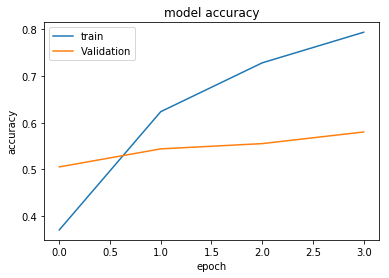

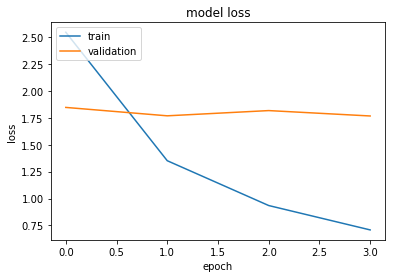

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
test_generator = ImageDataGenerator().flow_from_directory(
        'test/',
        target_size=(224, 224),
        shuffle = False,
        class_mode=None,
        batch_size=1)

# Get the filenames & remove directory specification in front of filename
filenames = [filename for filename in test_generator.filenames]

# Not predicting in batches but each inidividual item, therefore we need to know the amount of predictions
nb_samples = len(filenames)

# Reset before each call to predict
test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)


# Map predictions to the correct labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

ff = [f[5:] for f in filenames]

# Submit file
submission = pd.DataFrame({'name':ff,'category':predictions})
submission.to_csv('Resnet_5_epoch_augmentation_4_epoch.csv', index=False)
print("Done!")

Found 16858 images belonging to 1 classes.
16858/16858 [==============================] - 355s 21ms/step
Done!
